In [2]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.cluster import KMeans
import pandas as pd
from kmodes.kmodes import KModes

In [3]:
#we will plot number of keywords found on x axis
#we will plot number of matches from the global values on y axis
#openfile = open('/home/manan/Desktop/Research/Learning-Perspectives/results/bstr.txt')
#readfile = openfile.readlines()

## initialize with values from the teachers notes
conc_val = np.genfromtxt(fname = "/home/manan/Desktop/Research/Learning-Perspectives/code/bstr.txt",dtype='str')
conc_val = conc_val.astype(np.int)
print(conc_val)

[[0 0 1 ... 0 1 0]
 [0 0 1 ... 0 1 0]
 [0 0 0 ... 0 1 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 1 0]
 [0 0 0 ... 0 0 0]]


In [31]:
'''
df = pd.DataFrame(data=X)
df.info()
df.columns=["score","dummy"]
df.head(5)
'''

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       89 non-null     float64
 1   1       89 non-null     float64
dtypes: float64(2)
memory usage: 1.5 KB


,score,dummy
0,1.720000e+69,0.0
1,1.726279e+69,0.0
2,8.424991e+65,0.0
3,1.726279e+69,0.0
4,1.851466e+69,0.0


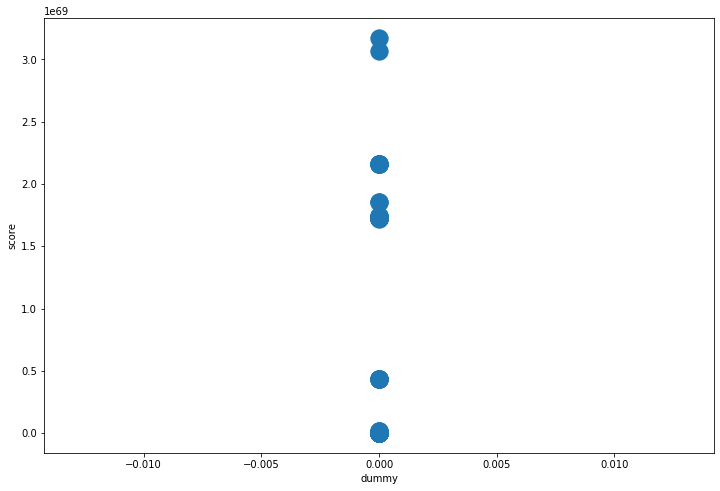

In [43]:
#df.plot.scatter(y='score',x='dummy', figsize=(12,8),style="s",s=300)

In [25]:
''''
## apply K means
kmeans = KMeans(n_clusters=3)
kmeans.fit(conc_val)
'''

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [52]:
'''
## cluster centres
print(kmeans.cluster_centers_)
'''

[[5.14843125e+67 0.00000000e+00]
 [1.80865594e+69 0.00000000e+00]
 [3.11882269e+69 0.00000000e+00]]


In [53]:
'''
## labelled data (which data is in which cluster)
print(kmeans.labels_)
'''

[1 1 0 1 1 1 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 2 0 1
 0 0 1 0 0 1 0 0 0 1 2 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 1 0 1 1 1 0 0 1
 0 0 0 1 0 1 0 0 0 1 0 1 1 1 1]


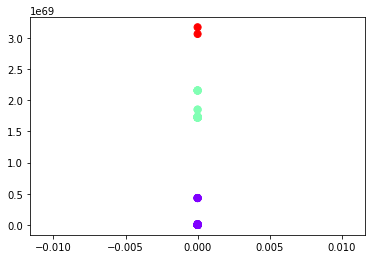

In [54]:
'''
## plot the devided map using colors!
plt.scatter(X[:,1],X[:,0], c=kmeans.labels_,cmap='rainbow',s=50)
'''

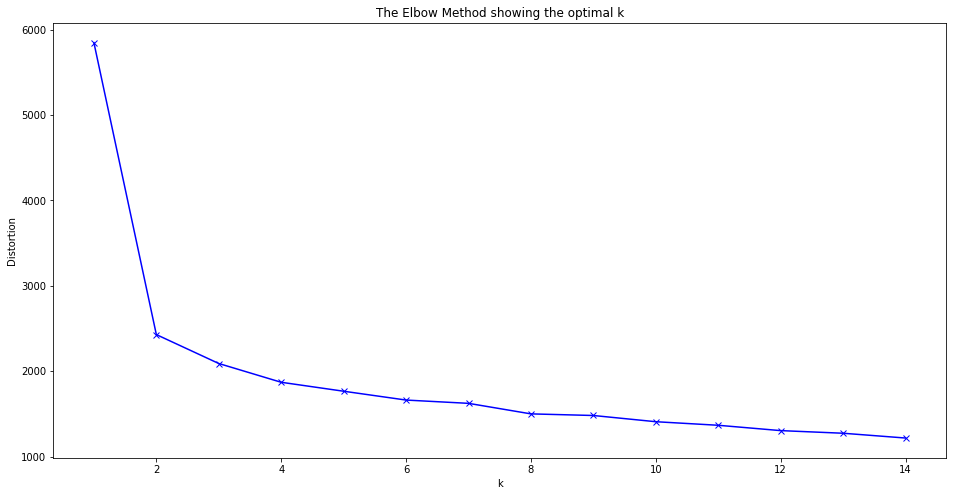

In [87]:
distortions = []
K = range(1,15)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(conc_val)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [92]:
kmeanModel = KMeans(n_clusters=8)
kmeanModel.fit(conc_val)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [93]:
print(kmeanModel.cluster_centers_)

[[ 6.93889390e-18  3.46944695e-18 -2.77555756e-16 ...  0.00000000e+00
  -2.22044605e-16  0.00000000e+00]
 [ 1.04083409e-17  5.20417043e-18  6.89655172e-01 ...  0.00000000e+00
   8.27586207e-01  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  8.00000000e-01 ...  0.00000000e+00
   8.00000000e-01  0.00000000e+00]
 ...
 [-3.46944695e-18 -1.73472348e-18  1.00000000e+00 ...  0.00000000e+00
   8.33333333e-01  0.00000000e+00]
 [ 5.00000000e-01  5.00000000e-01  5.00000000e-01 ...  0.00000000e+00
   1.00000000e+00  0.00000000e+00]
 [-3.46944695e-18 -1.73472348e-18  8.00000000e-01 ...  0.00000000e+00
   1.00000000e+00  0.00000000e+00]]


In [94]:
print(kmeanModel.labels_)

[7 1 3 1 1 1 2 2 1 3 1 0 5 1 1 0 0 1 3 3 0 2 0 1 2 1 2 1 1 7 7 1 5 1 1 3 3
 3 7 0 0 1 6 7 4 1 3 1 1 4 0 7 0 0 0 0 1 0 3 4 0 0 3 7 0 0 7 1 7 0 5 5 5 1
 0 1 0 0 3 6 1 1 0 4 7 0 1 0 1 5 1 3 4]


In [9]:
km = KModes(n_clusters=4)
km.fit(conc_val)

KModes(cat_dissim=<function matching_dissim at 0x7fce97a65560>, init='Cao',
       max_iter=100, n_clusters=4, n_init=1, n_jobs=1, random_state=None,
       verbose=0)

In [10]:
print(km.cluster_centroids_)
print(km.inertia_)

[[0 0 1 ... 0 1 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 1 0]
 [0 0 0 ... 0 0 0]]


AttributeError: 'KModes' object has no attribute 'inertia_'